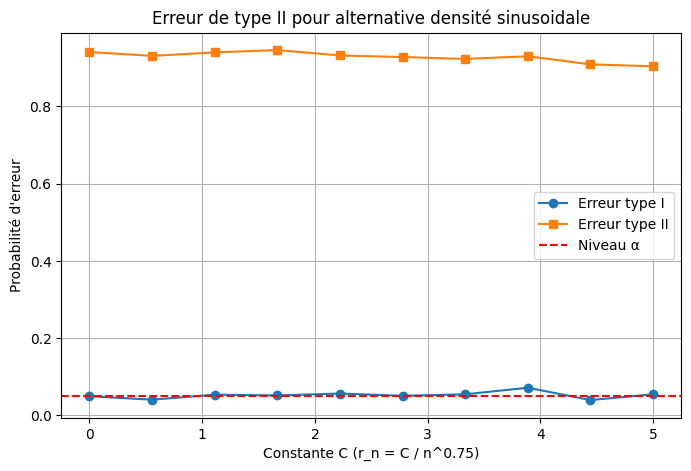

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Paramètres
n = 500
n_reps = 1000
alpha = 0.05
C_values = np.linspace(0, 5, 10) 

errors_type1 = []
errors_type2_sine = []

# Fonction pour simuler densité sinusoidale sur [0,1]
def simulate_H1_sine(n, delta):
    """
    Simulation par méthode de rejection sampling
    f(x) = 1 + delta*sin(2*pi*x), densité sur [0,1]
    """
    X = []
    while len(X) < n:
        u = np.random.rand(n)       # candidat uniforme
        y = np.random.rand(n) * (1 + delta)  # hauteur maximale = 1 + delta
        mask = y < (1 + delta * np.sin(2*np.pi*u))
        X.extend(u[mask])
    return np.array(X[:n])

# Boucle de simulation
for C in C_values:
    delta_n = C / (n**0.75)  # très petit, illustre condition (ii)
    
    # Type I : H0 uniforme
    rejections_H0 = 0
    for _ in range(n_reps):
        sample = np.random.rand(n)
        stat, pval = kstest(sample, 'uniform')
        if pval < alpha:
            rejections_H0 += 1
    errors_type1.append(rejections_H0 / n_reps)
    
    # Type II : H1 densité sinusoidale
    rejections_H1 = 0
    for _ in range(n_reps):
        sample = simulate_H1_sine(n, delta_n)
        stat, pval = kstest(sample, 'uniform')
        if pval < alpha:
            rejections_H1 += 1
    errors_type2_sine.append(1 - rejections_H1 / n_reps)

# Affichage
plt.figure(figsize=(8,5))
plt.plot(C_values, errors_type1, label="Erreur type I", marker='o')
plt.plot(C_values, errors_type2_sine, label="Erreur type II", marker='s')
plt.axhline(alpha, color='red', linestyle='--', label="Niveau α")
plt.xlabel("Constante C (r_n = C / n^0.75)")
plt.ylabel("Probabilité d'erreur")
plt.title("Erreur de type II pour alternative densité sinusoidale")
plt.legend()
plt.grid(True)
plt.show()


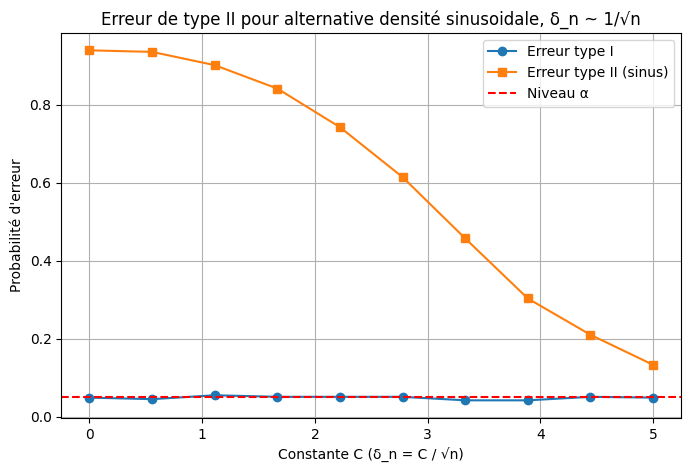

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Paramètres
n = 500
n_reps = 1000
alpha = 0.05
C_values = np.linspace(0, 5, 10)  # constantes C plus grandes

errors_type1 = []
errors_type2_sine = []

# Fonction pour simuler densité sinusoidale sur [0,1] (rejection sampling)
def simulate_H1_sine(n, delta):
    X = []
    while len(X) < n:
        u = np.random.rand(n)       # candidat uniforme
        y = np.random.rand(n) * (1 + delta)  # hauteur maximale = 1 + delta
        mask = y < (1 + delta * np.sin(2*np.pi*u))
        X.extend(u[mask])
    return np.array(X[:n])

# Boucle de simulation
for C in C_values:
    delta_n = C / np.sqrt(n)  #  r_n ~ taux minimax
    
    # Type I : H0 uniforme
    rejections_H0 = 0
    for _ in range(n_reps):   #n_reps = 1000
        sample = np.random.rand(n)  #n = 200
        stat, pval = kstest(sample, 'uniform')
        if pval < alpha:
            rejections_H0 += 1
    errors_type1.append(rejections_H0 / n_reps)
    
    # Type II : H1 densité sinusoidale
    rejections_H1 = 0
    for _ in range(n_reps):
        sample = simulate_H1_sine(n, delta_n)
        stat, pval = kstest(sample, 'uniform')
        if pval < alpha:
            rejections_H1 += 1
    errors_type2_sine.append(1 - rejections_H1 / n_reps)

# Affichage
plt.figure(figsize=(8,5))
plt.plot(C_values, errors_type1, label="Erreur type I", marker='o')
plt.plot(C_values, errors_type2_sine, label="Erreur type II (sinus)", marker='s')
plt.axhline(alpha, color='red', linestyle='--', label="Niveau α")
plt.xlabel("Constante C (δ_n = C / √n)")
plt.ylabel("Probabilité d'erreur")
plt.title("Erreur de type II pour alternative densité sinusoidale, δ_n ~ 1/√n")
plt.legend()
plt.grid(True)
plt.show()



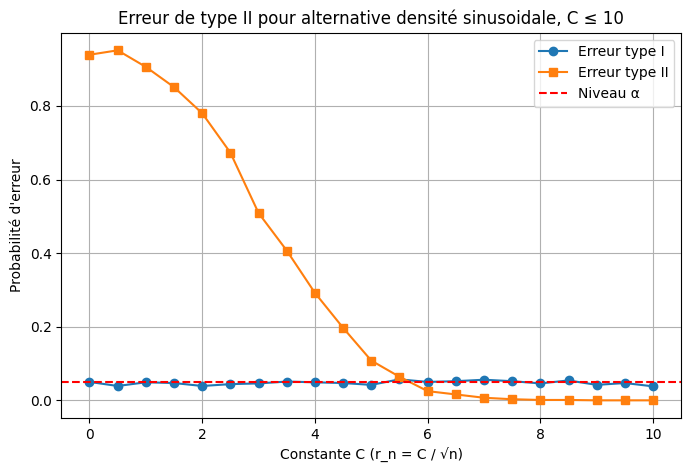

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Paramètres
n = 200
n_reps = 1000
alpha = 0.05
C_values = np.arange(0, 10.5, 0.5)  # 0, 0.5, ..., 10

errors_type1 = []
errors_type2_sine = []

# Fonction pour simuler densité sinusoidale sur [0,1] (rejection sampling)
def simulate_H1_sine(n, r_n):
    X = []
    while len(X) < n:
        u = np.random.rand(n)
        y = np.random.rand(n) * (1 + r_n)
        mask = y < (1 + r_n * np.sin(2*np.pi*u))
        X.extend(u[mask])
    return np.array(X[:n])

# Boucle de simulation
for C in C_values:
    r_n = C / np.sqrt(n)  # taux minimax
    
    # Type I : H0 uniforme
    rejections_H0 = 0
    for _ in range(n_reps):
        sample = np.random.rand(n)
        stat, pval = kstest(sample, 'uniform')
        if pval < alpha:
            rejections_H0 += 1
    errors_type1.append(rejections_H0 / n_reps)
    
    # Type II : H1 densité sinusoidale
    rejections_H1 = 0
    for _ in range(n_reps):
        sample = simulate_H1_sine(n, r_n)
        stat, pval = kstest(sample, 'uniform')
        if pval < alpha:
            rejections_H1 += 1
    errors_type2_sine.append(1 - rejections_H1 / n_reps)

# Affichage
plt.figure(figsize=(8,5))
plt.plot(C_values, errors_type1, label="Erreur type I", marker='o')
plt.plot(C_values, errors_type2_sine, label="Erreur type II", marker='s')
plt.axhline(alpha, color='red', linestyle='--', label="Niveau α")
plt.xlabel("Constante C (r_n = C / √n)")
plt.ylabel("Probabilité d'erreur")
plt.title("Erreur de type II pour alternative densité sinusoidale, C ≤ 10")
plt.legend()
plt.grid(True)
plt.show()



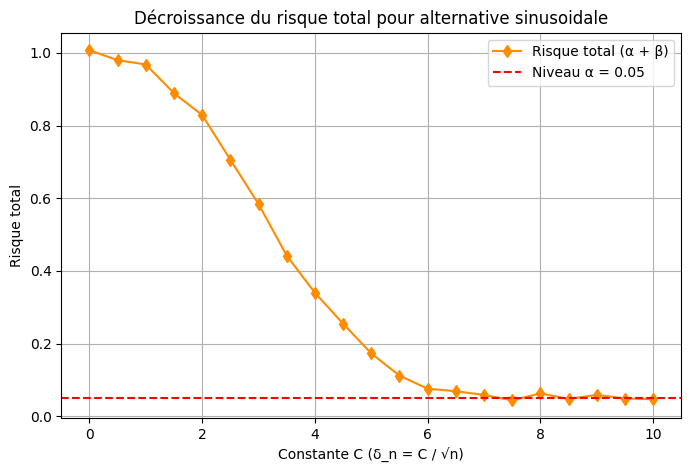

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Paramètres
n = 200
n_reps = 1000
alpha = 0.05
C_values = np.arange(0, 10.5, 0.5)  # C = 0,0.5,...,10

errors_type1 = []
errors_type2_sine = []

# Fonction pour simuler densité sinusoidale sur [0,1]
def simulate_H1_sine(n, delta):
    X = []
    while len(X) < n:
        u = np.random.rand(n)
        y = np.random.rand(n) * (1 + delta)
        mask = y < (1 + delta * np.sin(2*np.pi*u))
        X.extend(u[mask])
    return np.array(X[:n])

# Boucle de simulation
for C in C_values:
    delta_n = C / np.sqrt(n)

    
    # Type I
    rejections_H0 = 0
    for _ in range(n_reps):
        sample = np.random.rand(n)
        stat, pval = kstest(sample, 'uniform')
        if pval < alpha:
            rejections_H0 += 1
    type1 = rejections_H0 / n_reps
    errors_type1.append(type1)
    
    # Type II
    rejections_H1 = 0
    for _ in range(n_reps):
        sample = simulate_H1_sine(n, delta_n)
        stat, pval = kstest(sample, 'uniform')
        if pval < alpha:
            rejections_H1 += 1
    type2 = 1 - rejections_H1 / n_reps
    errors_type2_sine.append(type2)

# Risque total = type I + type II
risk_total = np.array(errors_type1) + np.array(errors_type2_sine)

# Affichage
plt.figure(figsize=(8,5))
plt.plot(C_values, risk_total, label="Risque total (α + β)", marker='d', color='darkorange')
plt.axhline(alpha, color='red', linestyle='--', label=f"Niveau α = {alpha}")
plt.xlabel("Constante C (δ_n = C / √n)")
plt.ylabel("Risque total")
plt.title("Décroissance du risque total pour alternative sinusoidale")
plt.legend()
plt.grid(True)
plt.show()


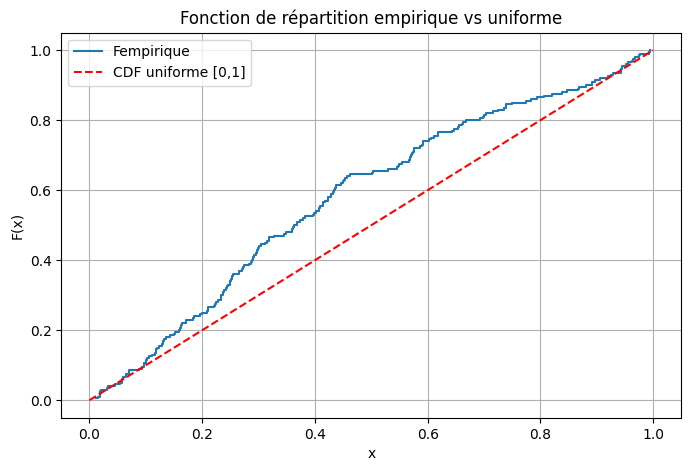

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n = 200       # taille de l'échantillon
delta = 0.5   # perturbation
np.random.seed(0)  # pour reproductibilité

# Fonction pour générer un échantillon selon la densité sinus (rejection sampling)
def simulate_H1_sine(n, delta):
    X = []
    while len(X) < n:
        u = np.random.rand(n)
        y = np.random.rand(n) * (1 + delta)
        mask = y < (1 + delta * np.sin(2*np.pi*u))
        X.extend(u[mask])
    return np.array(X[:n])

# Générer un échantillon
sample = simulate_H1_sine(n, delta)

# Calcul de la fonction de répartition empirique
x_sorted = np.sort(sample)
ecdf = np.arange(1, n+1) / n

# Tracé
plt.figure(figsize=(8,5))
plt.step(x_sorted, ecdf, where='post', label='Fempirique')
plt.plot([0,1], [0,1], 'r--', label='CDF uniforme [0,1]')  # CDF uniforme pour comparaison
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Fonction de répartition empirique vs uniforme")
plt.legend()
plt.grid(True)
plt.show()


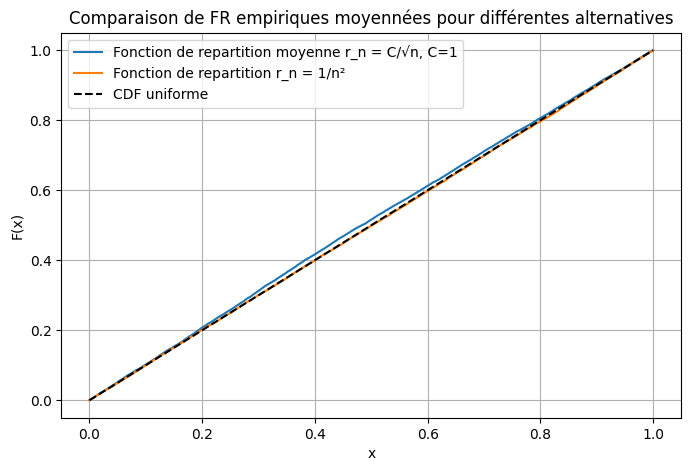

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n = 500
C = 1
r_n1 = C / np.sqrt(n)
r_n2 = 1 / n**2
n_reps = 50  # nombre de simulations pour moyenne

# Définir la densité alternative f1(x)
def f1(x, r_n):
    return 1 + r_n * np.sin(2 * np.pi * x)

# Générer un échantillon par rejection sampling
def sample_f1(n, r_n):
    X = []
    while len(X) < n:
        u = np.random.rand(n)
        y = np.random.rand(n) * (1 + r_n)
        mask = y < f1(u, r_n)
        X.extend(u[mask])
    return np.array(X[:n])

# Fonction pour calculer ECDF moyenne
def mean_ecdf(n, r_n, n_reps):
    grid = np.linspace(0,1,1000)
    ecdf_sum = np.zeros_like(grid)
    for _ in range(n_reps):
        sample = sample_f1(n, r_n)
        ecdf_y = np.searchsorted(np.sort(sample), grid, side='right') / n
        ecdf_sum += ecdf_y
    return ecdf_sum / n_reps

# Calcul des ECDF moyennes
ecdf_mean1 = mean_ecdf(n, r_n1, n_reps)
ecdf_mean2 = mean_ecdf(n, r_n2, n_reps)

# CDF uniforme pour référence
x_grid = np.linspace(0,1,1000)
F0 = x_grid

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_grid, ecdf_mean1, label=f'Fonction de repartition moyenne r_n = C/√n, C={C}')
plt.plot(x_grid, ecdf_mean2, label='Fonction de repartition r_n = 1/n²')
plt.plot(x_grid, F0, linestyle='--', color='black', label='CDF uniforme')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Comparaison de FR empiriques moyennées pour différentes alternatives')
plt.legend()
plt.grid(True)
plt.show()

